# Predicting Employee Attrition

In this project I address employee churn, which is a significant expense for companies. The Society for Human Resource Management estimates the average replacement cost of a salaried employee is the equivalent of six to nine months’ salary. Using the IBM HR Analytics Employee Attrition & Performance dataset from Kaggle and well established data science techniques, I build a classification model to help better predict when an employee is a flight risk. This will allow  management an opportunity to intervene before an employee leaves, which can help reduce employee churn and the cost of replacing and training new employees. 

## Import Packages

These are the packages I use for the project.

In [446]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
	
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.utils import resample

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset

The dataset used for this project is the IBM HR Analytics Employee Attrition & Performance dataset from Kaggle which was created by IBM. It contains 23,436 rows representing individual employees. There are 32 different features including age, education, gender, marital status, overtime worked, etc. Attrition is the target.

## Import Data

In [447]:
# load the dataset
df = pd.read_csv("../data/IBM_HR_Data_newer.csv")

# set so it displays all columns
pd.set_option('display.max_columns', None)

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Exploration & Manipulation

In [448]:
# look at the dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [449]:
# look at the numeric columns
df.describe()

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23433.000000,23424.000000,23424.000000,23427.000000,23427.000000,23429.000000,23425.000000,23427.000000,23426.000000,23428.000000,23426.000000,23427.000000,23428.00000,23425.000000,23426.000000,23423.000000,23421.000000,23425.000000,23429.000000
mean,36.936671,801.828765,2.910050,13.681777,2.733811,2.064023,14304.343821,3.887779,3.155852,2.713334,79.993469,0.799846,11.25922,2.800171,2.761803,7.010887,4.227445,2.183821,4.127577
std,9.137432,403.206166,1.024931,1186.544372,0.836860,1.105421,7102.636293,155.332904,0.371215,1.080030,0.706850,1.122454,7.77237,1.308527,0.705788,6.138394,3.627284,3.218615,3.572379
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,1.000000,8053.000000,1.000000,3.000000,2.000000,80.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,3.000000,3.000000,3.000000,2.000000,14222.000000,2.000000,3.000000,3.000000,80.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,4.000000,4.000000,3.000000,3.000000,20460.000000,4.000000,3.000000,4.000000,80.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,6.000000,129588.000000,54.000000,5.000000,26999.000000,23258.000000,13.000000,4.000000,80.000000,80.000000,40.00000,30.000000,4.000000,40.000000,22.000000,17.000000,17.000000


In [450]:
# check for NAs
df.isna().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [451]:
# as there are not many NAs I will drop them from the dataframe
df = df.dropna()

In [452]:
# look at values in target 'Attrition'
df.Attrition.unique()

array(['Voluntary Resignation', 'Current employee'], dtype=object)

In [453]:
# make target column binary
cleanup_att = {"Attrition": {"Current employee": 0, "Voluntary Resignation": 1}}

In [454]:
df.replace(cleanup_att, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [455]:
# drop columns that contain no unique values or that aren't useful for modeling
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Application ID', 'Over18', 'StandardHours'], axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [456]:
# convert 'DistanceFromHome', 'HourlyRate', 'JobSatisfaction', 'PercentSalaryHike', and 'MonthlyIncome' to floats 
# to eliminate warning received when adding in categorical features 

In [457]:
df['DistanceFromHome'] = df['DistanceFromHome'].astype(float)

In [458]:
df['HourlyRate'] = df['HourlyRate'].astype(float)

In [459]:
df['JobSatisfaction'] = df['HourlyRate'].astype(float)

In [460]:
df['PercentSalaryHike'] = df['PercentSalaryHike'].astype(float)

In [461]:
df['MonthlyIncome'] = df['MonthlyIncome'].astype(float)

In [462]:
# identify target/split off target
X = df.drop('Attrition', axis=1)
y = df.Attrition

In [463]:
# target balance
df.Attrition.value_counts(normalize=True)

0    0.841665
1    0.158335
Name: Attrition, dtype: float64

## Create Train and Test Data

In [464]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2020)

## Create Validation Data

In [465]:
# create validation data
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 2020)

## Pre-process Training Data

In [466]:
# isolate numerical columns
X_t_num = X_t.select_dtypes(exclude='object')
X_t_num.shape

(14850, 23)

In [467]:
# scale numerical data
ss = StandardScaler()
X_t_sc = pd.DataFrame(ss.fit_transform(X_t_num), index= X_t_num.index, columns= X_t_num.columns)
X_t_sc.shape

(14850, 23)

In [468]:
# add in one hot encoded
ohe = OneHotEncoder(sparse= False, drop= 'first')

X_t_cat = X_t.select_dtypes(include= 'object')

#fit transform
X_t_oh = pd.DataFrame(ohe.fit_transform(X_t_cat), index= X_t_cat.index, columns=ohe.get_feature_names(X_t_cat.columns))
X_t_oh.shape

(14850, 30)

In [469]:
# merge databases
X_t_f = pd.merge(X_t_sc, X_t_oh, left_index=True, right_index=True)
X_t_f.shape

(14850, 53)

In [470]:
# smote
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_t_sm, y_t_sm = smote.fit_sample(X_t_f, y_t)

## Pre-process Validation Data

In [471]:
# isolate numerical columns
X_val_num = X_val.select_dtypes(exclude='object')
X_val_num.shape

(3713, 23)

In [472]:
# scale numerical data
X_val_sc = pd.DataFrame(ss.transform(X_val_num), index= X_val_num.index, columns= X_val_num.columns)
X_val_sc.shape

(3713, 23)

In [473]:
# one hot encoded

X_val_cat = X_val.select_dtypes(include= 'object')

# transform
X_val_oh = pd.DataFrame(ohe.transform(X_val_cat), index= X_val_cat.index, columns=ohe.get_feature_names(X_val_cat.columns))
X_val_oh.shape

(3713, 30)

In [474]:
# merge databases
X_val_f = pd.merge(X_val_sc, X_val_oh, left_index=True, right_index=True)
X_val_f.shape

(3713, 53)

## Model Metrics

I will use Accuracy and F-1 Score (a balance of Precision and Recall) as my primary metrics. In this business case, minimizing the number of False Negatives (the number of employees predicted to stay that actually leave) is important and is generally measured by a Recall Score. But a case can be made that minimizing False Positives (the number of employees predicted to leave that actually stay) is also important and is generally measured by a Precision Score. So an F-1 Score is considered to be a nice balanced metric between Precision and Recall.

## First Simple Model


Logistic regression does not perform very well  even after tuning several hyper parameters. I will move onto other models that usually perform better in binary classification such as Random Forest and K Nearest Neighbor.

In [475]:
# instantiate model
lg = LogisticRegression()

# fit model
lg.fit(X_t_sm, y_t_sm)

# check accuracy on training data
lg.score(X_t_sm, y_t_sm)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6822616762635957

In [476]:
# validation testing

# set predictions
pred_lg_val = lg.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_lg_val))
print(classification_report(y_val, pred_lg_val))

[[2149 1000]
 [ 185  379]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      3149
           1       0.27      0.67      0.39       564

    accuracy                           0.68      3713
   macro avg       0.60      0.68      0.59      3713
weighted avg       0.82      0.68      0.72      3713



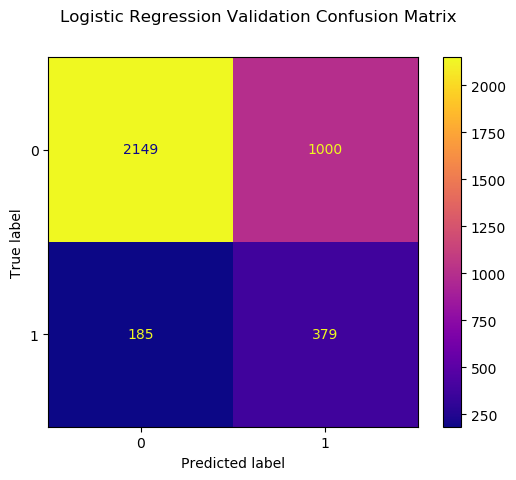

In [477]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression Validation Confusion Matrix ")

plot_confusion_matrix(lg, X_val_f, y_val, ax=ax, cmap="plasma");

## Support Vector Machine (SVM)

In [478]:
# instantiate model
svm = svm.SVC()

# fit model
svm.fit(X_t_sm, y_t_sm)

# check accuracy on training data
svm.score(X_t_sm, y_t_sm)

0.9828854766474728

In [479]:
# validation testing

# set predictions
pred_svm_val = svm.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_svm_val))
print(classification_report(y_val, pred_svm_val))

[[3035  114]
 [  23  541]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3149
           1       0.83      0.96      0.89       564

    accuracy                           0.96      3713
   macro avg       0.91      0.96      0.93      3713
weighted avg       0.97      0.96      0.96      3713



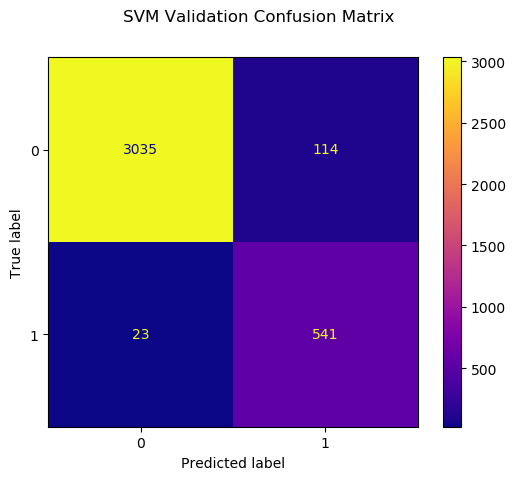

In [480]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("SVM Validation Confusion Matrix ")

plot_confusion_matrix(svm, X_val_f, y_val, ax=ax, cmap="plasma");

## Random Forest Classifier

In [481]:
# instantiate model
rfm = RandomForestClassifier()

# fit model
rfm.fit(X_t_sm, y_t_sm)

# check accuracy
rfm.score(X_t_sm, y_t_sm)

1.0

In [482]:
# validation testing

# set predictions
pred_rfm_val = rfm.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_rfm_val))
print(classification_report(y_val, pred_rfm_val))

[[3149    0]
 [   9  555]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3149
           1       1.00      0.98      0.99       564

    accuracy                           1.00      3713
   macro avg       1.00      0.99      1.00      3713
weighted avg       1.00      1.00      1.00      3713



In [483]:
# adjust some hyper parameters to address overfitting

# instantiate model
rfm2 = RandomForestClassifier(n_estimators=50, max_depth=50, max_leaf_nodes=500)

# fit model
rfm2.fit(X_t_sm, y_t_sm)

# check accuracy on training data
rfm2.score(X_t_sm, y_t_sm)

0.9960812539987204

In [484]:
# validation testing

# set predictions
pred_rfm2_val = rfm2.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_rfm2_val))
print(classification_report(y_val, pred_rfm2_val))

[[3134   15]
 [  36  528]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3149
           1       0.97      0.94      0.95       564

    accuracy                           0.99      3713
   macro avg       0.98      0.97      0.97      3713
weighted avg       0.99      0.99      0.99      3713



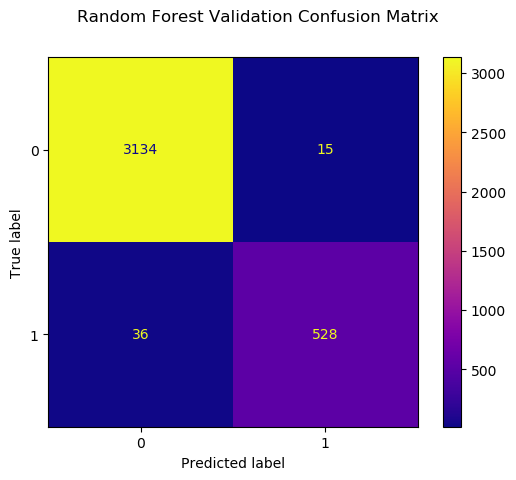

In [485]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Random Forest Validation Confusion Matrix ")

plot_confusion_matrix(rfm2, X_val_f, y_val, ax=ax, cmap="plasma");

### K Nearest Neighbor (KNN)

In [486]:
# instantiate model
knn = KNeighborsClassifier()
# fit model
knn = knn.fit(X_t_sm, y_t_sm)
# check accuracy
knn.score(X_t_sm, y_t_sm)

0.9940818937939859

In [487]:
# validation testing

# set predictions
pred_knn_val = knn.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_knn_val))
print(classification_report(y_val, pred_knn_val))

[[3059   90]
 [   3  561]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3149
           1       0.86      0.99      0.92       564

    accuracy                           0.97      3713
   macro avg       0.93      0.98      0.95      3713
weighted avg       0.98      0.97      0.98      3713



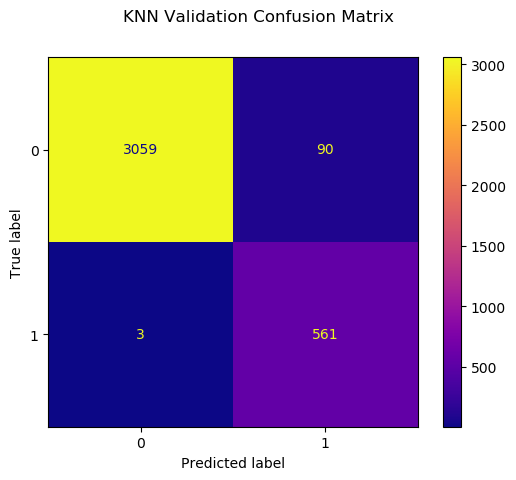

In [488]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("KNN Validation Confusion Matrix ")

plot_confusion_matrix(knn, X_val_f, y_val, ax=ax, cmap="plasma");

### Model Stacking

### The Stacked Model performs the best based on Accuracy and F-1 Score and I will use it as my final model.

In [489]:
from sklearn.ensemble import StackingClassifier

# Create Base Learners
base_learners = [
                 ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('knn', KNeighborsClassifier(n_neighbors=5))             
                ]

# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# fit model and check accuracy score
clf.fit(X_t_sm, y_t_sm).score(X_t_sm, y_t_sm)

0.9999200255918106

In [490]:
# validation testing

# set predictions
pred_clf_val = clf.predict(X_val_f)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_clf_val))
print(classification_report(y_val, pred_clf_val))

[[3143    6]
 [   7  557]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3149
           1       0.99      0.99      0.99       564

    accuracy                           1.00      3713
   macro avg       0.99      0.99      0.99      3713
weighted avg       1.00      1.00      1.00      3713



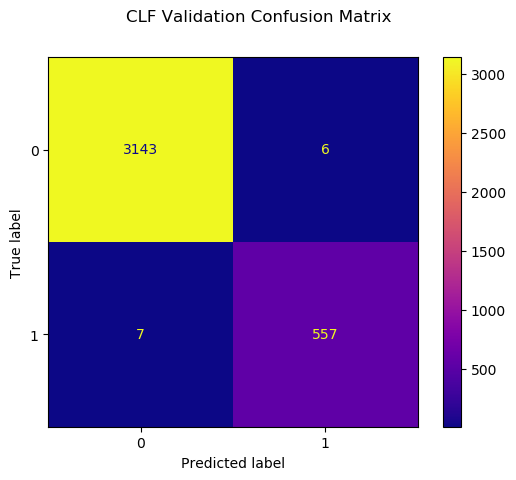

In [491]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("CLF Validation Confusion Matrix ")

plot_confusion_matrix(clf, X_val_f, y_val, ax=ax, cmap="plasma");

## Pre-process Entire Training Set for Final Model

In [492]:
# isolate numerical columns
X_train_num = X_train.select_dtypes(exclude='object')
X_train_num.shape

(18563, 23)

In [493]:
# scale numerical data
ss_f = StandardScaler()

X_train_sc = pd.DataFrame(ss_f.fit_transform(X_train_num), index= X_train_num.index, columns= X_train_num.columns)
X_train_sc.shape

(18563, 23)

In [494]:
# one hot encode
ohe_f = OneHotEncoder(sparse= False, handle_unknown='ignore')

X_train_cat = X_train.select_dtypes(include= 'object')

#fit transform
X_train_oh = pd.DataFrame(ohe_f.fit_transform(X_train_cat), index= X_train_cat.index, columns=ohe_f.get_feature_names(X_train_cat.columns))
X_train_oh.shape

(18563, 38)

In [495]:
# merge databases
X_train_f = pd.merge(X_train_sc, X_train_oh, left_index=True, right_index=True)
X_train_f.shape

(18563, 61)

In [496]:
# smote
sm_f = SMOTE()

X_train_sm, y_train_sm = smote.fit_sample(X_train_f, y_train)

## Pre-processing Test Data for Final Model

In [497]:
# isolate numerical columns
X_test_num = X_test.select_dtypes(exclude='object')

X_test_num.shape

(4641, 23)

In [498]:
# scale numerical data
X_test_sc = pd.DataFrame(ss_f.transform(X_test_num), index= X_test_num.index, columns= X_test_num.columns)

X_test_sc.shape

(4641, 23)

In [499]:
# one hot encode

X_test_cat = X_test.select_dtypes(include= 'object')

X_test_oh = pd.DataFrame(ohe_f.transform(X_test_cat), index= X_test_cat.index, columns=ohe_f.get_feature_names(X_test_cat.columns))

In [500]:
# merge databases
X_test_f = pd.merge(X_test_sc, X_test_oh, left_index=True, right_index=True)
X_test_f.shape

(4641, 61)

In [501]:
X_test_f.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Employee Source_Adzuna,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek,Employee Source_Test
47,0.451180,-1.632534,-0.641749,0.089184,-1.563887,-0.480092,0.385196,-0.061440,-0.480092,0.602377,-0.670447,0.930916,0.761398,-0.426856,0.269089,-0.936913,-0.421933,1.706613,0.339228,0.158826,0.760973,1.491800,0.798056,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15040,-0.207917,0.040245,-1.011677,0.089184,1.170791,0.945961,0.385196,0.842296,0.945961,2.420606,-1.375740,-0.673856,-1.150350,-0.426856,-0.656272,0.243801,-0.292763,0.157400,0.339228,-0.495077,-0.615636,-0.368220,-0.318320,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7392,-0.976863,1.675795,0.837963,-0.882942,-0.652328,0.109999,1.793584,-0.061440,0.109999,-0.181442,-1.336354,-1.075049,1.034504,-0.426856,0.269089,-0.936913,-0.292763,-0.617207,0.339228,0.158826,-0.340315,-0.678223,0.798056,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3900,-0.757164,0.506836,-0.765059,0.089184,1.170791,1.093484,0.385196,-0.965176,1.093484,-0.818852,-0.811393,-0.272663,-1.150350,-0.426856,0.269089,-0.936913,-0.421933,1.706613,0.339228,-0.331601,-0.615636,-0.678223,-0.039226,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20988,0.561029,-1.319819,-0.888368,0.089184,1.170791,-0.480092,-1.023193,-0.965176,-0.480092,-0.832431,-0.888618,-0.673856,-1.150350,-0.426856,0.269089,0.243801,-0.163593,0.932007,0.339228,0.322302,0.485651,1.491800,1.077151,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Re-fit Final Model to Entire Training Set

##### Stacked Model

In [502]:
# fit model
clf = clf.fit(X_train_sm, y_train_sm)
# check accuracy
clf.score(X_train_sm, y_train_sm)

0.9999361144828467

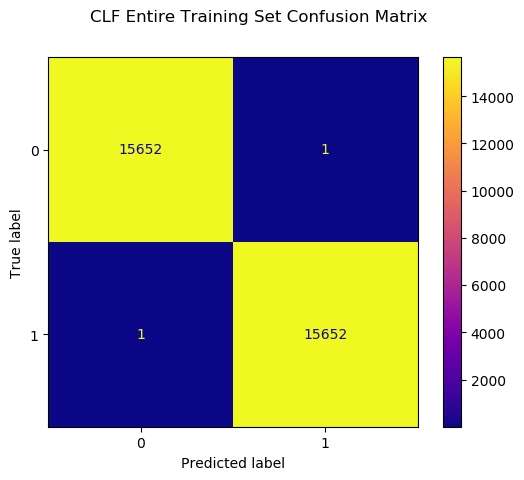

In [503]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("CLF Entire Training Set Confusion Matrix ")

plot_confusion_matrix(clf, X_train_sm, y_train_sm, ax=ax, cmap="plasma");

## Run Final Model on Test Data

##### Stacked Model

In [504]:
clf.score(X_test_f, y_test)

0.9946132299073476

In [505]:
# set predictions
pred_clf_test = clf.predict(X_test_f)

# confusion matrix and classification report
print(confusion_matrix(y_test, pred_clf_test))
print(classification_report(y_test, pred_clf_test))

[[3875    2]
 [  23  741]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3877
           1       1.00      0.97      0.98       764

    accuracy                           0.99      4641
   macro avg       1.00      0.98      0.99      4641
weighted avg       0.99      0.99      0.99      4641



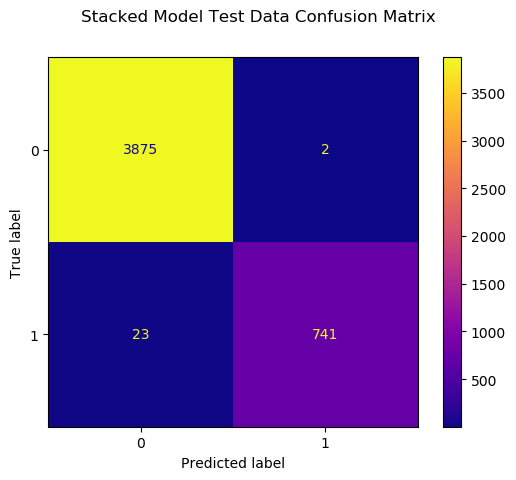

In [506]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Stacked Model Test Data Confusion Matrix ")

plot_confusion_matrix(clf, X_test_f, y_test, ax=ax, cmap="plasma");
plt.savefig('../reports/figures/stacked.png', transparent=True);

### Final Model Results

The model’s accuracy on test data is .99 with an F-1 score of 100%.
The model correctly predicts that 3,875 employees will not leave the company, and it correctly predicts that 741 employees will leave the company. It incorrectly predicts that 2 employees will leave, when they actually stay. And it incorrectly predicts that 23 employees will stay, when they actually leave. Overall the model is effective at predicting employee churn although improvements could be made.

## Future Development Ideas

1. Build more models, including Decision Tree, Naive Bayes, Boosting Classifiers, and a Neural Network model.
2. Explore the role gender plays in attrition. Gender equality is a very important issue and it would be interesting to delve deeper into this dataset to specifically look at gender.
3. Explore the role COVID-19 plays in attrition. Once data from 2020 is available it will be critical to analyze it. The workforce has changed in so many ways since March 2020 including many more people working remotely. How will this impact employee attrition?

## Visualizations

### EDA

In [507]:
# create correlations for plotting correlation to target "Attrition"
corr = df.corr().Attrition
corr

Age                        -0.152499
Attrition                   1.000000
DailyRate                  -0.057693
DistanceFromHome            0.070526
Education                  -0.034173
EnvironmentSatisfaction    -0.049242
HourlyRate                  0.012129
JobInvolvement             -0.067376
JobLevel                   -0.082734
JobSatisfaction             0.012129
MonthlyIncome              -0.077028
MonthlyRate                -0.007611
NumCompaniesWorked          0.041399
PercentSalaryHike          -0.025954
PerformanceRating          -0.006951
RelationshipSatisfaction   -0.006423
StockOptionLevel           -0.093956
TotalWorkingYears          -0.082839
TrainingTimesLastYear      -0.047668
WorkLifeBalance            -0.026016
YearsAtCompany             -0.061603
YearsInCurrentRole         -0.085874
YearsSinceLastPromotion    -0.019884
YearsWithCurrManager       -0.066837
Name: Attrition, dtype: float64

['Age', 'Stockoptionlevel', 'Yearsincurrentrole', 'Totalworkingyears', 'Joblevel']
[15.24993238235162, 9.39563458360493, 8.587435422465385, 8.283863982056682, 8.273424625510241]


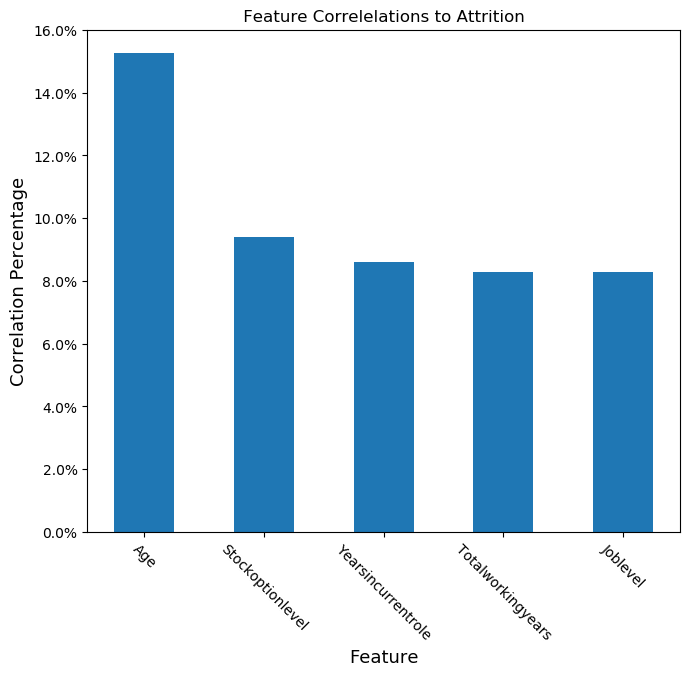

In [508]:
# function to plot feature correlations
def create_plot_of_feature_importances(coeff_dict, top_num=10, figsize=(7, 6), title='Feature Importances', xlabel='Feature', ylabel='Correlation Percentage', append_title='', prepend_title='', width=0.8, xrot=0, bar_colors=None, percent=None, save_path=None):
    ''' 
    Inputs: 
    
    model: A trained ensemble model instance
    X: a dataframe of the features used to train the model
    '''
    dict_keys = [key for key in coeff_dict.keys()]
    dict_values = [abs(value) for value in coeff_dict.values()]
    
    coeff_dict = {dict_keys[x]: dict_values[x] for x in range(len(dict_values))}
    coeff_dict = dict(list(coeff_dict.items())[:])
    features_and_importances = zip(coeff_dict.keys(), coeff_dict.values())
    features_and_importances = sorted(features_and_importances, key = lambda x: x[1], reverse=True)
    
    features = [i[0].title() for i in features_and_importances[1:top_num+1]]
    print(features)
    importances = [abs(i[1])*100 for i in features_and_importances[1:top_num+1]]
    print(importances)
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=figsize)
#     width = .35
    plt.bar(features, importances, width=width, color=bar_colors)
    if percent:
        ax.yaxis.set_major_formatter(PercentFormatter())
#     plt.gca().invert_yaxis()
    title = ' '.join([prepend_title, title, append_title])
    plt.title(title)
    plt.xlabel('Feature', fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.xticks(rotation=xrot)
    plt.axis('tight')
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, transparent=True)
min_percent = 0.12
corr = df.corr().Attrition
corr=dict(corr)
create_plot_of_feature_importances(corr, title='Feature Correlelations to Attrition', top_num=5, width=0.5, percent=True)
plt.xticks(rotation=-45);
plt.savefig('../reports/figures/corrs.png', transparent=True);

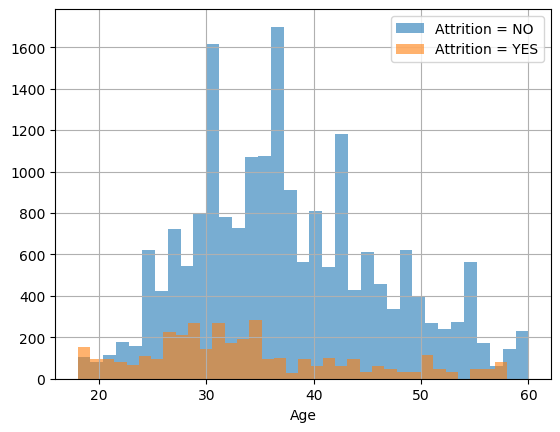

In [509]:
# plot attrition by age
df[df["Attrition"] == 0]['Age'].hist(bins=35,label='Attrition = NO', alpha=0.6)
df[df["Attrition"] == 1]['Age'].hist(bins=35, label='Attrition = YES', alpha=0.6)
plt.legend()
plt.xlabel('Age')
plt.savefig('../reports/figures/age_dist.png', transparent=True);

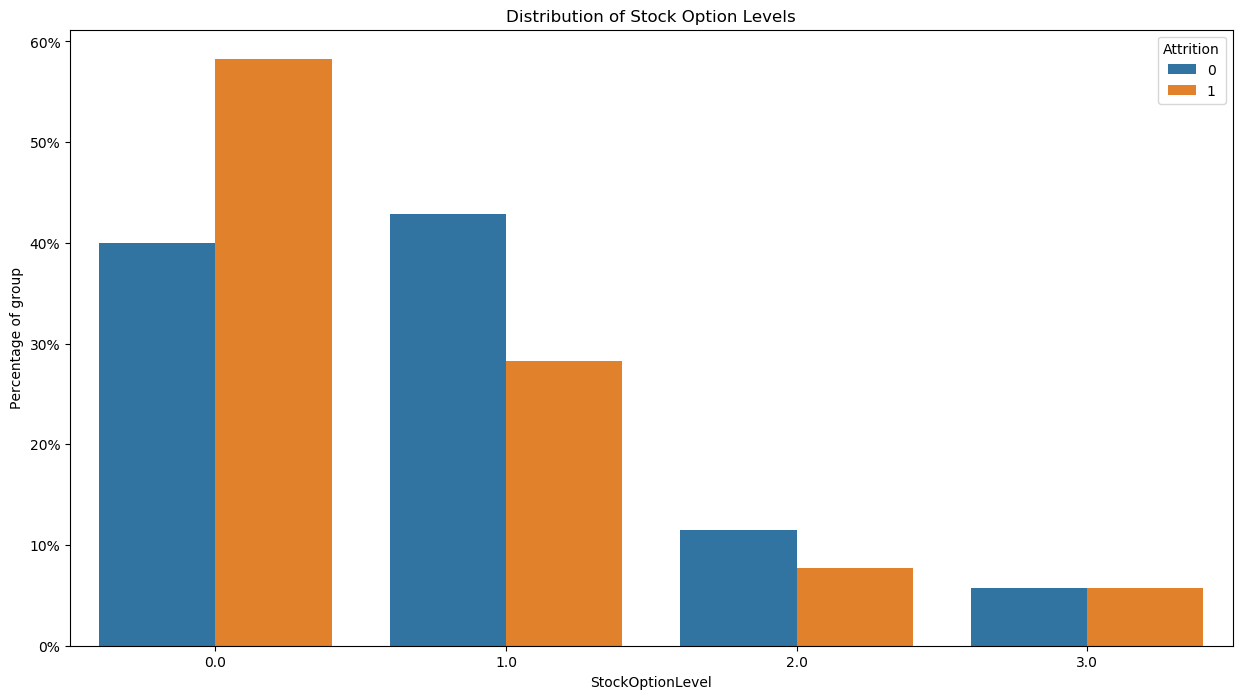

In [510]:
# plot attrition by stock option levels
f,ax = plt.subplots(figsize=(15,8))
grouped_data = df["StockOptionLevel"].groupby(df["Attrition"]).value_counts(normalize = True).rename("Percentage of group").reset_index()
sns.barplot(x = "StockOptionLevel", y = "Percentage of group", hue = "Attrition", data = grouped_data)

# convert y axis to percentage format
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set(title = "Distribution of Stock Option Levels")
# plt.show()
plt.savefig('../reports/figures/stock_dist.png', transparent=True);

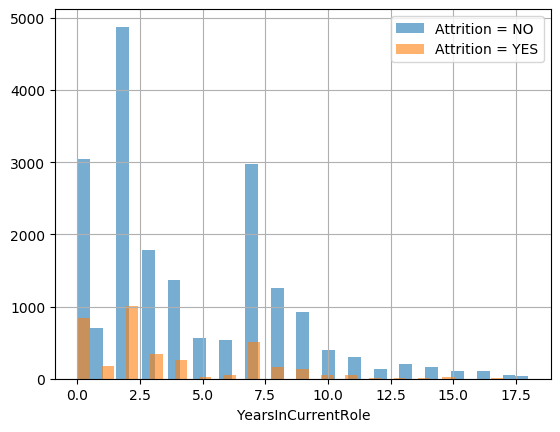

In [511]:
# plot attrition by years in role
df[df["Attrition"] == 0]['YearsInCurrentRole'].hist(bins=35, label='Attrition = NO', alpha=0.6)
df[df["Attrition"] == 1]['YearsInCurrentRole'].hist(bins=35, label='Attrition = YES', alpha=0.6)
plt.legend()
plt.xlabel('YearsInCurrentRole');
plt.savefig('../reports/figures/years_role_dist.png', transparent=True);

### Model Feature Importances

In [512]:
# check feature importances from Random Forest model
rfm2.feature_importances_

array([0.09053797, 0.05578684, 0.04102369, 0.02240467, 0.02011212,
       0.03962751, 0.01391015, 0.01664424, 0.0380517 , 0.05215912,
       0.04029122, 0.01456862, 0.02977756, 0.00536969, 0.01746456,
       0.03472297, 0.03758832, 0.02289616, 0.01555764, 0.02961576,
       0.03089664, 0.02147341, 0.02566192, 0.02640652, 0.00986934,
       0.01494822, 0.01163455, 0.02431006, 0.00568754, 0.01882291,
       0.00314033, 0.01197819, 0.00726169, 0.00243248, 0.00668531,
       0.00253674, 0.004665  , 0.00338457, 0.00619249, 0.00605395,
       0.00461812, 0.00929633, 0.01815977, 0.04113934, 0.01007609,
       0.00543289, 0.00482555, 0.00615626, 0.00600684, 0.00408803,
       0.00187472, 0.00617365, 0.        ])

In [513]:
# create list of feature importances 
importances = list(zip(rfm2.feature_importances_, X_test_f.columns))
importances.sort(reverse=True)
importances

[(0.09053796642962586, 'Age'),
 (0.05578683739573007, 'DailyRate'),
 (0.05215911917128817, 'MonthlyIncome'),
 (0.04113933585388546, 'JobRole_Research Scientist'),
 (0.04102369499708555, 'DistanceFromHome'),
 (0.04029122176187963, 'MonthlyRate'),
 (0.039627508477106575, 'HourlyRate'),
 (0.03805170289755352, 'JobSatisfaction'),
 (0.03758832105921595, 'TotalWorkingYears'),
 (0.034722974028545746, 'StockOptionLevel'),
 (0.030896642320317292, 'YearsInCurrentRole'),
 (0.029777561305541465, 'PercentSalaryHike'),
 (0.029615755855894585, 'YearsAtCompany'),
 (0.02640652493626312, 'BusinessTravel_Non-Travel'),
 (0.02566192494722388, 'YearsWithCurrManager'),
 (0.024310063432944316, 'Department_Research & Development'),
 (0.02289615820010404, 'TrainingTimesLastYear'),
 (0.022404669640922845, 'Education'),
 (0.021473409406446334, 'YearsSinceLastPromotion'),
 (0.020112123691489115, 'EnvironmentSatisfaction'),
 (0.018822913800604107, 'EducationField_Human Resources'),
 (0.01815977362024358, 'JobRole_R

In [514]:
# create dictionary of top 5 feature importances
RF_coeff_dict = {'Age': 0.09406852129929472,
 'Monthly Income': 0.04770349380938059,
 'JobRole_Research Scientist': 0.04561267500851705,
 'Distance From Home': 0.0444963958982302,
 'TotalWorkingYears': 0.041323081413408465}

In [515]:
# function to plot feature importances
def create_plot_of_feature_importances(coeff_dict, top_num=10, title='Feature Importances', append_title='Model', prepend_title=''):
    ''' 
    Inputs: 
    
    model: A trained ensemble model instance
    X: a dataframe of the features used to train the model
    '''
    dict_keys = [key for key in coeff_dict.keys()]
    dict_values = [abs(value) for value in coeff_dict.values()]
    
    coeff_dict = {dict_keys[x]: dict_values[x] for x in range(len(dict_values))}
    coeff_dict = dict(list(coeff_dict.items())[:top_num])
    features_and_importances = zip(coeff_dict.keys(), coeff_dict.values())
    features_and_importances = sorted(features_and_importances, key = lambda x: x[1], reverse=True)
    
    features = [i[0] for i in features_and_importances]
    importances = [abs(i[1]) for i in features_and_importances]
    
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances)
    plt.gca().invert_yaxis()
    title = ' '.join([prepend_title, title, append_title])
    plt.title(title)
    plt.xlabel('importance')
    plt.tight_layout()

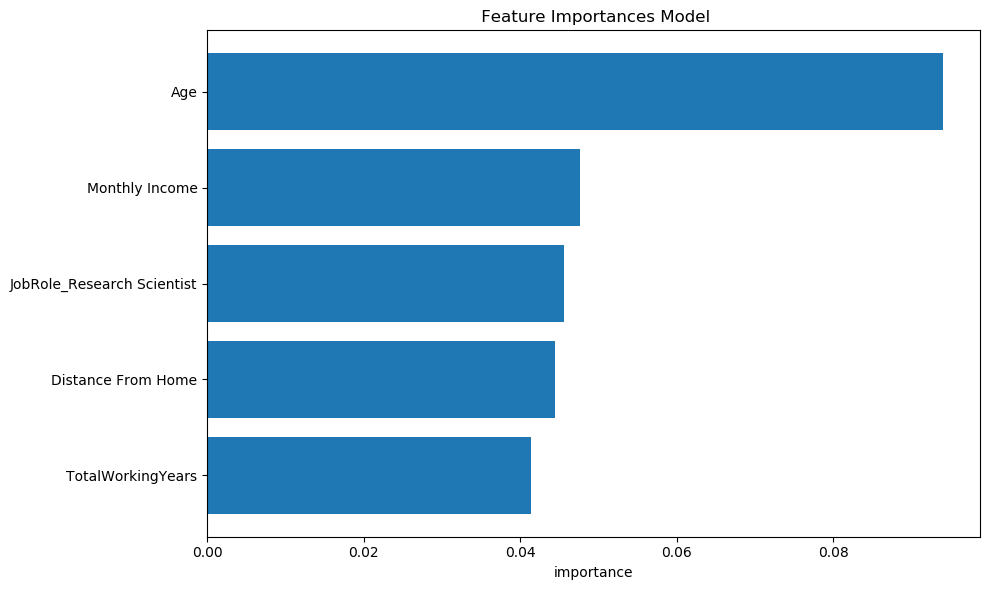

In [516]:
# plor feature importances
create_plot_of_feature_importances(RF_coeff_dict, prepend_title='')
plt.savefig('../reports/figures/model_feat.png', transparent=True);

## Summary

By using CRISP - DM tecniques and machine learning algorithms I create a binary classification model with .99% accuracy and 100% F-1 score. This model, used alongside an understanding of the business and employee base is helpful in accurately predicting when an employee will leave the company.

My initial data exploration finds a close correlation between age and attrition. Additionally, it identifies stock option level, years in current role, total working years, and job level as in the top five highest correlated features to attrition.

My model feature importances also identify age as a top five feature importance. And if we assume daily rate, monthly income, hourly rate and monthly rate to be highly correlated with each other, then the next highest non compensation related feature importance becomes total working years. Note this is also the fourth highest correlated feature identified in initial data exploration.